In [1]:
# Skip if idinn is already installed
%pip install idinn

In [2]:
from torch.utils.tensorboard import SummaryWriter
from idinn.sourcing_model import SingleSourcingModel
from idinn.sourcing_model import DualSourcingModel
from idinn.controller import SingleSourcingNeuralController
from idinn.controller import DualSourcingNeuralController
from idinn.demand import UniformDemand
import torch

%config InlineBackend.figure_format = "retina"

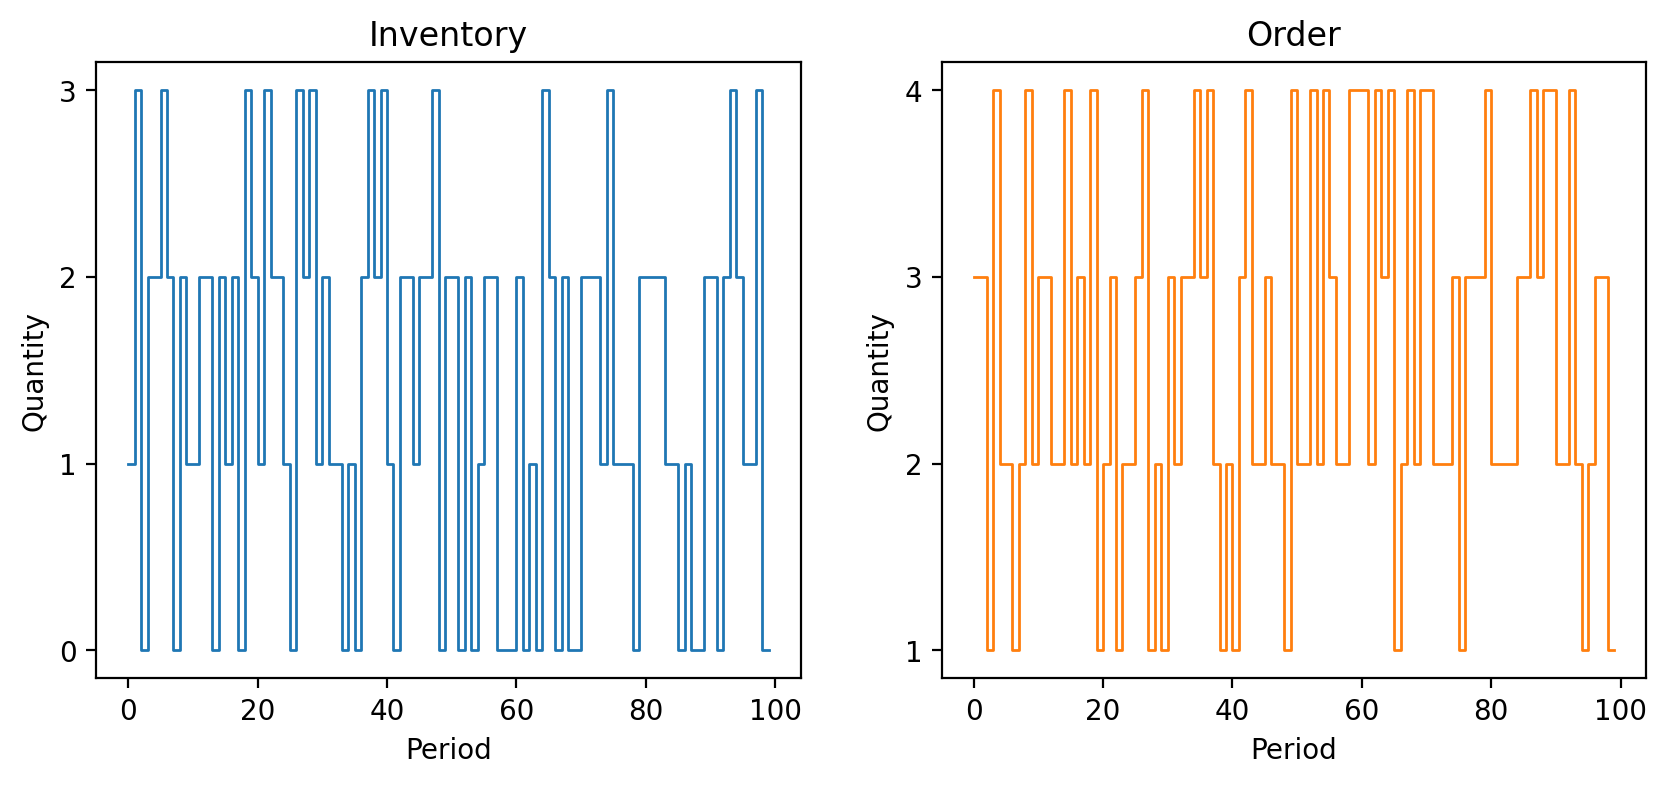

In [12]:
single_sourcing_model = SingleSourcingModel(
  lead_time=0,
  holding_cost=5,
  shortage_cost=495,
  batch_size=32,
  init_inventory=10,
  demand_generator=UniformDemand(low=1, high=4),
)
single_controller = SingleSourcingNeuralController(
    hidden_layers=[2],
    activation=torch.nn.CELU(alpha=1)
)
single_controller.fit(
    sourcing_model=single_sourcing_model,
    sourcing_periods=50,
    epochs=5000,
    seed=1
)
single_controller.plot(sourcing_model=single_sourcing_model, sourcing_periods=100)

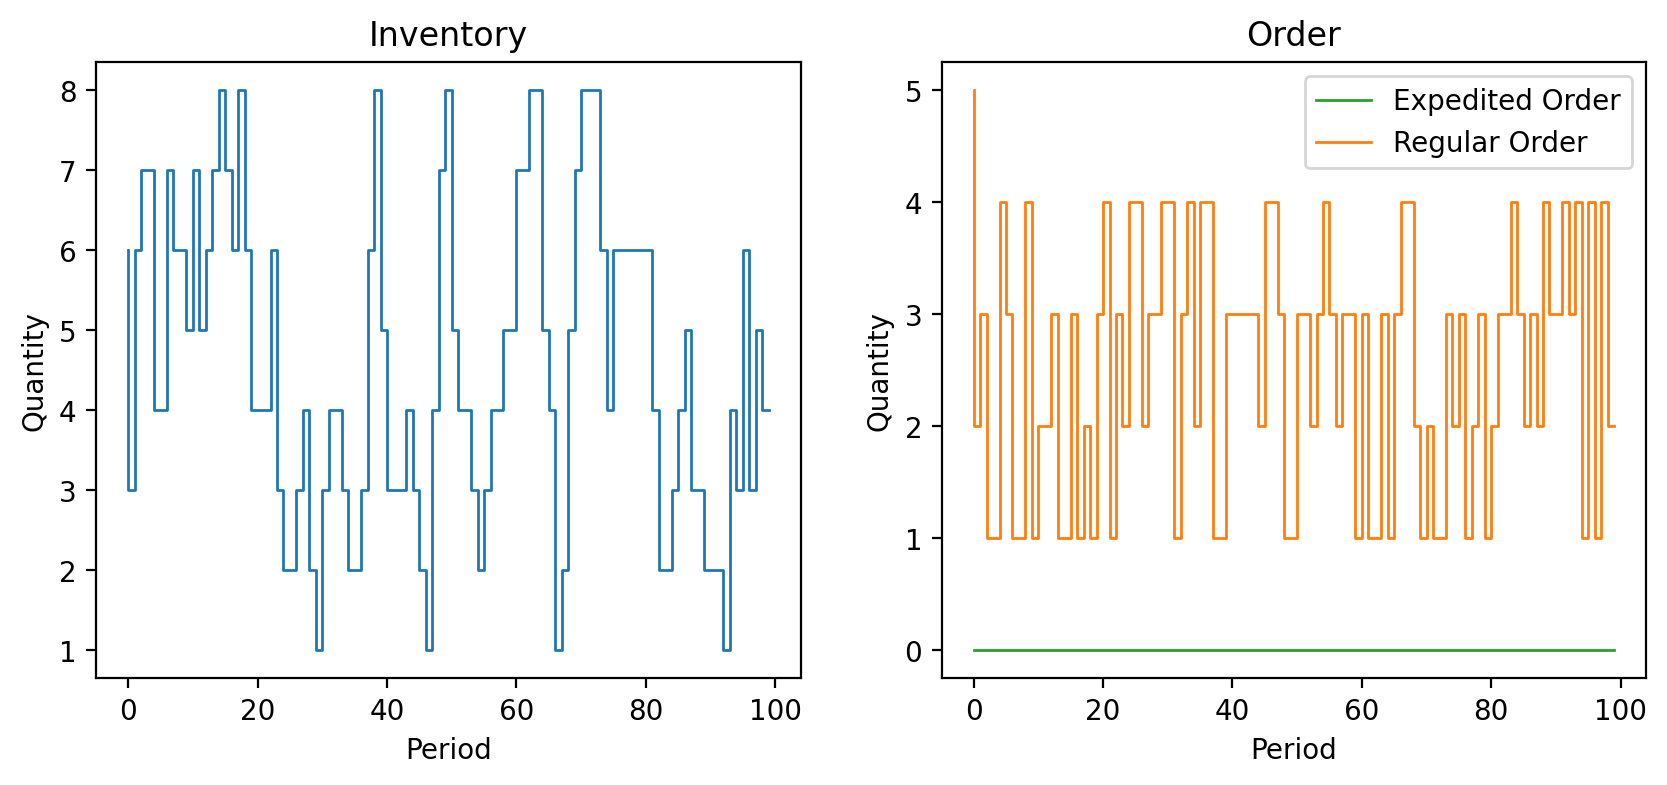

In [14]:
dual_sourcing_model = DualSourcingModel(
    regular_lead_time=2,
    expedited_lead_time=0,
    regular_order_cost=0,
    expedited_order_cost=20,
    holding_cost=5,
    shortage_cost=495,
    batch_size=128,
    init_inventory=6,
    demand_generator=UniformDemand(low=1, high=4),
)
dual_controller = DualSourcingNeuralController(
    hidden_layers=[128, 64, 32, 16, 8, 4],
    activation=torch.nn.ReLU()
)
dual_controller.fit(
    sourcing_model=dual_sourcing_model,
    sourcing_periods=50,
    validation_sourcing_periods=1000,
    epochs=1000,
    tensorboard_writer=SummaryWriter(),
    seed=3
)
dual_controller.plot(sourcing_model=dual_sourcing_model, sourcing_periods=100)